<a href="https://colab.research.google.com/github/obeabi/ProjectPortfolio/blob/master/Cat_Non_Cat_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Abiola Obembe
## Image Classification using  deep neural network archtecture
### Date: 17-08-2020
#### Aim : Quantifying impact of activation function on Cat vs Non-Cat dataset

## Install libraries

In [89]:
# install packages
import time
import h5py
import numpy as np
import scipy
from PIL import  Image
import matplotlib.pyplot as plt
from dnn_app_utils_v4 import *
from scipy import ndimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)
print(" Packages installed succefully!")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
 Packages installed succefully!


## Load Dataset: Cat vs Non-Cat Dataset

y = 0. It's a non-cat picture.


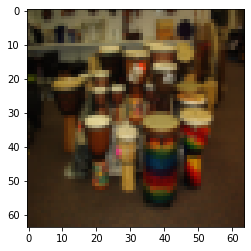

In [90]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

# Example of a pictures
index = 5
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")


y = 0. It's a non-cat picture.


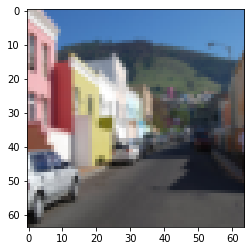

In [91]:
# Example of picture
index = 1
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

y = 1. It's a cat picture.


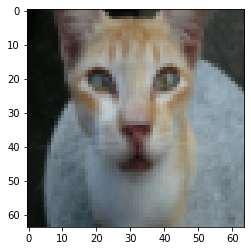

In [92]:
index = 11
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [93]:
# Initial data exploration
print(train_x_orig.shape)
print(train_y.shape)
print(test_y.shape)
print(test_x_orig.shape)


(209, 64, 64, 3)
(1, 209)
(1, 50)
(50, 64, 64, 3)


In [94]:
# Explore your dataset clearly
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [95]:
# Reshape/flatten/unroll images
train_x_flatten = train_x_orig.reshape(m_train, -1).T
test_x_flatten = test_x_orig.reshape(m_test,-1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


## Build deep -L Neural Network archeticture

### Model 1: Relu activation in hidden layers with sigmoid activation in output layer

## Build and Train Model 1

In [96]:
# # CONSTANTS DEFINING THE MODEL 
n_x = train_x.shape[0]     # num_px * num_px * 3 i.e. input features
n_h1 = 20                    # number of units in hidden layer 1
n_h2 = 7
n_h3 = 5
n_y = 1                    # output layer
layers_dims = [n_x, n_h1, n_h2, n_h3, n_y] #  4-layer model
print(layers_dims)

[12288, 20, 7, 5, 1]


In [97]:
# FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False, activation= 'relu'):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches =  L_model_forward(X, parameters,activation)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
       
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches,activation)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


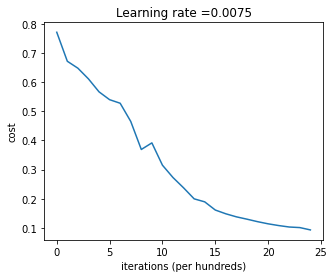

In [98]:
# train NN model
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True, activation = 'relu')

In [99]:
## Accuracy from training and test set for Model 1 (Relu)
print( " The training set accuracy is:")
predictions_train = predict(train_x, train_y, parameters,activation='relu')

print( " The test set accuracy is:")
predictions_test = predict(test_x, test_y, parameters, activation='relu')


 The training set accuracy is:
Accuracy: 0.9856459330143539
 The test set accuracy is:
Accuracy: 0.8


Cost after iteration 0: 0.771749
Cost after iteration 100: 0.691083
Cost after iteration 200: 0.688052
Cost after iteration 300: 0.685165
Cost after iteration 400: 0.682309
Cost after iteration 500: 0.679499
Cost after iteration 600: 0.676798
Cost after iteration 700: 0.674183
Cost after iteration 800: 0.671396
Cost after iteration 900: 0.668556
Cost after iteration 1000: 0.665526
Cost after iteration 1100: 0.662127
Cost after iteration 1200: 0.658723
Cost after iteration 1300: 0.655091
Cost after iteration 1400: 0.651670
Cost after iteration 1500: 0.648067
Cost after iteration 1600: 0.644360
Cost after iteration 1700: 0.640512
Cost after iteration 1800: 0.636625
Cost after iteration 1900: 0.632646
Cost after iteration 2000: 0.628726
Cost after iteration 2100: 0.624913
Cost after iteration 2200: 0.620889
Cost after iteration 2300: 0.617147
Cost after iteration 2400: 0.612765


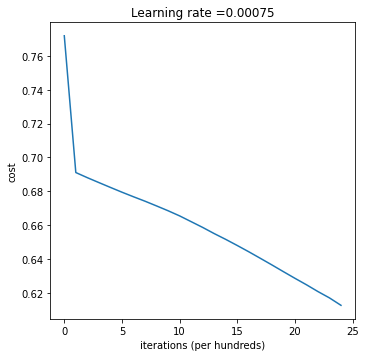

Accuracy: 0.52
Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


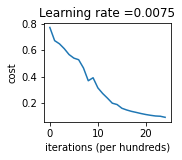

Accuracy: 0.8
Cost after iteration 0: 0.771749
Cost after iteration 100: 0.644633
Cost after iteration 200: 0.643983
Cost after iteration 300: 0.643974
Cost after iteration 400: 0.643974
Cost after iteration 500: 0.643974
Cost after iteration 600: 0.643974
Cost after iteration 700: 0.643974
Cost after iteration 800: 0.643974
Cost after iteration 900: 0.643974
Cost after iteration 1000: 0.643974
Cost after iteration 1100: 0.643974
Cost after iteration 1200: 0.643974
Cost after iteration 1300: 0.643974
Cost after iteration 1400: 0.643974
Cost after iteration 1500: 0.643974
Cost after iteration 1600: 0.643974
Cost after iteration 1700: 0.643974
Cost after iteration 1800: 0.643974
Cost after iteration 1900: 0.643974
Cost after iteration 2000: 0.643974
Cost after iteration 2100: 0.643974
Cost after iteration 2200: 0.643974
Cost after iteration 2300: 0.643974
Cost after iteration 2400: 0.643974


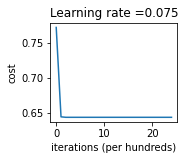

Accuracy: 0.3400000000000001
Cost after iteration 0: 0.771749
Cost after iteration 100: 0.644121
Cost after iteration 200: 0.643974
Cost after iteration 300: 0.643974
Cost after iteration 400: 0.643974
Cost after iteration 500: 0.643974
Cost after iteration 600: 0.643974
Cost after iteration 700: 0.643974
Cost after iteration 800: 0.643974
Cost after iteration 900: 0.643974
Cost after iteration 1000: 0.643974
Cost after iteration 1100: 0.643974
Cost after iteration 1200: 0.643974
Cost after iteration 1300: 0.643974
Cost after iteration 1400: 0.643974
Cost after iteration 1500: 0.643974
Cost after iteration 1600: 0.643974
Cost after iteration 1700: 0.643974
Cost after iteration 1800: 0.643974
Cost after iteration 1900: 0.643974
Cost after iteration 2000: 0.643974
Cost after iteration 2100: 0.643974
Cost after iteration 2200: 0.643974
Cost after iteration 2300: 0.643974
Cost after iteration 2400: 0.643974


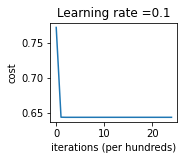

Accuracy: 0.3400000000000001


In [100]:
# Sensitivity on learning rate This may take a while to run

plt.figure(figsize=(12, 12))
learning_rates = [ 0.00075, 0.0075, 0.075, 0.1]
for i, learning_rate in enumerate(learning_rates):
    plt.subplot(2, 2, i+1)
    plt.title('Learning rate is %d' % learning_rate)
    parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate, num_iterations = 2500, print_cost = True, activation = 'relu')    
    #print ("Accuracy for learning_rate: {} ".format(learning_rate))
    predictions_test = predict(test_x, test_y, parameters, activation='relu')

### Model 2: Leaky Relu activation in hidden layers with sigmoid activation in output layer

## Build and Train Model 2

In [101]:
# # CONSTANTS DEFINING THE MODEL 
n_x = train_x.shape[0]     # num_px * num_px * 3 i.e. input features
n_h1 = 20                    # number of units in hidden layer 1
n_h2 = 7
n_h3 = 5
n_y = 1                    # output layer
layers_dims = [n_x, n_h1, n_h2, n_h3, n_y] #  4-layer model
print(layers_dims)

[12288, 20, 7, 5, 1]


Cost after iteration 0: 0.770396
Cost after iteration 100: 0.673405
Cost after iteration 200: 0.651700
Cost after iteration 300: 0.629924
Cost after iteration 400: 0.590008
Cost after iteration 500: 0.525753
Cost after iteration 600: 0.485273
Cost after iteration 700: 0.422071
Cost after iteration 800: 0.369013
Cost after iteration 900: 0.327881
Cost after iteration 1000: 0.290290
Cost after iteration 1100: 0.245000
Cost after iteration 1200: 0.218055
Cost after iteration 1300: 0.188969
Cost after iteration 1400: 0.162809
Cost after iteration 1500: 0.146359
Cost after iteration 1600: 0.129217
Cost after iteration 1700: 0.113470
Cost after iteration 1800: 0.098643
Cost after iteration 1900: 0.098822
Cost after iteration 2000: 0.080609
Cost after iteration 2100: 0.073273
Cost after iteration 2200: 0.067416
Cost after iteration 2300: 0.063161
Cost after iteration 2400: 0.058005


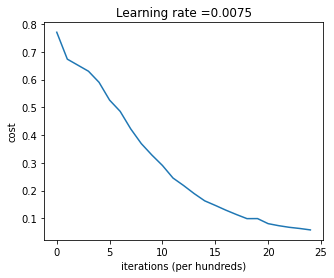

In [102]:
# train NN model 2
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True, activation = 'leaky_relu')

In [103]:
## Accuracy from training and test set for Model 2 (Leaky Relu)
print( " The training set accuracy is:")
predictions_train = predict(train_x, train_y, parameters,activation='leaky_relu')

print( " The test set accuracy is:")
predictions_test = predict(test_x, test_y, parameters, activation='leaky_relu')

 The training set accuracy is:
Accuracy: 0.9999999999999998
 The test set accuracy is:
Accuracy: 0.7200000000000001


Cost after iteration 0: 0.770396
Cost after iteration 100: 0.691259
Cost after iteration 200: 0.688255
Cost after iteration 300: 0.685506
Cost after iteration 400: 0.682753
Cost after iteration 500: 0.679985
Cost after iteration 600: 0.677021
Cost after iteration 700: 0.674007
Cost after iteration 800: 0.671137
Cost after iteration 900: 0.668369
Cost after iteration 1000: 0.665550
Cost after iteration 1100: 0.662678
Cost after iteration 1200: 0.659686
Cost after iteration 1300: 0.656342
Cost after iteration 1400: 0.652882
Cost after iteration 1500: 0.649268
Cost after iteration 1600: 0.645383
Cost after iteration 1700: 0.641609
Cost after iteration 1800: 0.638042
Cost after iteration 1900: 0.634043
Cost after iteration 2000: 0.630855
Cost after iteration 2100: 0.626666
Cost after iteration 2200: 0.622633
Cost after iteration 2300: 0.618698
Cost after iteration 2400: 0.614759


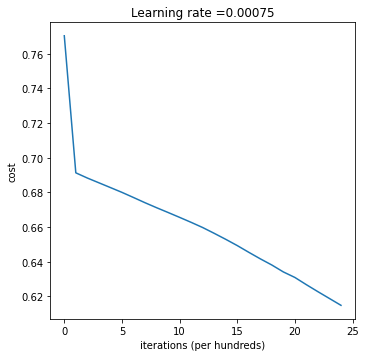

Accuracy: 0.52
Cost after iteration 0: 0.770396
Cost after iteration 100: 0.673405
Cost after iteration 200: 0.651700
Cost after iteration 300: 0.629924
Cost after iteration 400: 0.590008
Cost after iteration 500: 0.525753
Cost after iteration 600: 0.485273
Cost after iteration 700: 0.422071
Cost after iteration 800: 0.369013
Cost after iteration 900: 0.327881
Cost after iteration 1000: 0.290290
Cost after iteration 1100: 0.245000
Cost after iteration 1200: 0.218055
Cost after iteration 1300: 0.188969
Cost after iteration 1400: 0.162809
Cost after iteration 1500: 0.146359
Cost after iteration 1600: 0.129217
Cost after iteration 1700: 0.113470
Cost after iteration 1800: 0.098643
Cost after iteration 1900: 0.098822
Cost after iteration 2000: 0.080609
Cost after iteration 2100: 0.073273
Cost after iteration 2200: 0.067416
Cost after iteration 2300: 0.063161
Cost after iteration 2400: 0.058005


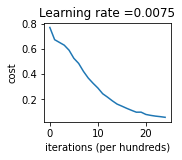

Accuracy: 0.7200000000000001
Cost after iteration 0: 0.770396
Cost after iteration 100: 0.644654
Cost after iteration 200: 0.643999
Cost after iteration 300: 0.643850
Cost after iteration 400: 0.643714
Cost after iteration 500: 0.643546
Cost after iteration 600: 0.630022
Cost after iteration 700: 0.603053
Cost after iteration 800: 0.613077
Cost after iteration 900: 0.529199
Cost after iteration 1000: 0.489835
Cost after iteration 1100: 0.392688
Cost after iteration 1200: 0.640737
Cost after iteration 1300: 0.427677
Cost after iteration 1400: 0.555198
Cost after iteration 1500: 0.660665
Cost after iteration 1600: 0.564339
Cost after iteration 1700: 0.645109
Cost after iteration 1800: 0.162808
Cost after iteration 1900: 0.150991
Cost after iteration 2000: 0.095534
Cost after iteration 2100: 0.820236
Cost after iteration 2200: 0.103563
Cost after iteration 2300: 0.758871
Cost after iteration 2400: 0.560507


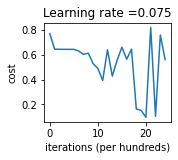

Accuracy: 0.74
Cost after iteration 0: 0.770396
Cost after iteration 100: 0.644221
Cost after iteration 200: 0.643927
Cost after iteration 300: 0.643743
Cost after iteration 400: 0.643547
Cost after iteration 500: 0.626303
Cost after iteration 600: 0.628018
Cost after iteration 700: 0.570493
Cost after iteration 800: 0.484715
Cost after iteration 900: 0.419450
Cost after iteration 1000: 0.476263
Cost after iteration 1100: 0.542615
Cost after iteration 1200: 0.360300
Cost after iteration 1300: 0.376237
Cost after iteration 1400: 0.341887
Cost after iteration 1500: 0.319185
Cost after iteration 1600: 0.351344
Cost after iteration 1700: 0.254577
Cost after iteration 1800: 0.295482
Cost after iteration 1900: 0.247802
Cost after iteration 2000: 0.577888
Cost after iteration 2100: 0.155822
Cost after iteration 2200: 0.170161
Cost after iteration 2300: 0.242087
Cost after iteration 2400: 0.164889


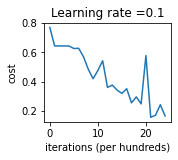

Accuracy: 0.74


In [104]:
# Sensitivity on learning rate This may take a while to run

plt.figure(figsize=(12, 12))
learning_rates = [ 0.00075, 0.0075, 0.075, 0.1]
for i, learning_rate in enumerate(learning_rates):
    plt.subplot(2, 2, i+1)
    plt.title('Learning rate is %d' % learning_rate)
    parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate, num_iterations = 2500, print_cost = True, activation = 'leaky_relu')    
    #print ("Accuracy for learning_rate: {} ".format(learning_rate))
    predictions_test = predict(test_x, test_y, parameters, activation='leaky_relu')

### Model 3: TANH activation in hidden layers with sigmoid activation in output layer

## Build and Train Model 3

In [105]:
# # CONSTANTS DEFINING THE MODEL 
n_x = train_x.shape[0]     # num_px * num_px * 3 i.e. input features
n_h1 = 20                    # number of units in hidden layer 1
n_h2 = 7
n_h3 = 5
n_y = 1                    # output layer
layers_dims = [n_x, n_h1, n_h2, n_h3, n_y] #  4-layer model
print(layers_dims)

[12288, 20, 7, 5, 1]


Cost after iteration 0: 0.682692
Cost after iteration 100: 0.589848
Cost after iteration 200: 0.481069
Cost after iteration 300: 0.391199
Cost after iteration 400: 0.378454
Cost after iteration 500: 0.313534
Cost after iteration 600: 0.259018
Cost after iteration 700: 0.190947
Cost after iteration 800: 0.152801
Cost after iteration 900: 0.149634
Cost after iteration 1000: 0.106248
Cost after iteration 1100: 0.089175
Cost after iteration 1200: 0.076756
Cost after iteration 1300: 0.067255
Cost after iteration 1400: 0.059624
Cost after iteration 1500: 0.053144
Cost after iteration 1600: 0.047425
Cost after iteration 1700: 0.042265
Cost after iteration 1800: 0.036907
Cost after iteration 1900: 0.032327
Cost after iteration 2000: 0.029062
Cost after iteration 2100: 0.026550
Cost after iteration 2200: 0.024492
Cost after iteration 2300: 0.022749
Cost after iteration 2400: 0.021243


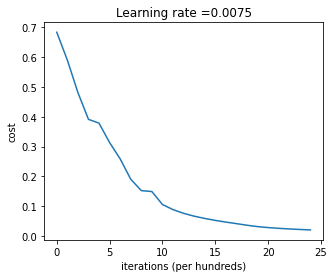

In [106]:
# train NN model 3
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True, activation = 'tanh')

In [107]:
## Accuracy from training and test set for Model 3 (tanh)
print( " The training set accuracy is:")
predictions_train = predict(train_x, train_y, parameters,activation='tanh')

print( " The test set accuracy is:")
predictions_test = predict(test_x, test_y, parameters, activation='tanh')

 The training set accuracy is:
Accuracy: 0.9999999999999998
 The test set accuracy is:
Accuracy: 0.7


Cost after iteration 0: 0.682692
Cost after iteration 100: 0.639418
Cost after iteration 200: 0.619315
Cost after iteration 300: 0.587950
Cost after iteration 400: 0.563641
Cost after iteration 500: 0.544496
Cost after iteration 600: 0.528173
Cost after iteration 700: 0.513600
Cost after iteration 800: 0.500176
Cost after iteration 900: 0.487530
Cost after iteration 1000: 0.475421
Cost after iteration 1100: 0.463690
Cost after iteration 1200: 0.452238
Cost after iteration 1300: 0.441015
Cost after iteration 1400: 0.430007
Cost after iteration 1500: 0.419222
Cost after iteration 1600: 0.408674
Cost after iteration 1700: 0.398370
Cost after iteration 1800: 0.388313
Cost after iteration 1900: 0.378502
Cost after iteration 2000: 0.368932
Cost after iteration 2100: 0.359598
Cost after iteration 2200: 0.350494
Cost after iteration 2300: 0.341611
Cost after iteration 2400: 0.332943


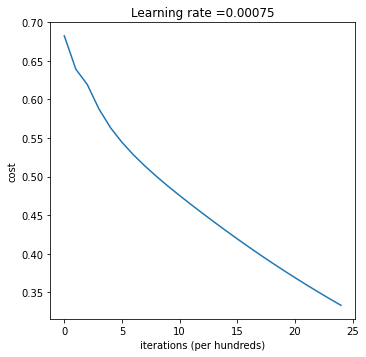

Accuracy for learning_rate: 0.00075 
Accuracy: 0.6800000000000002
Cost after iteration 0: 0.682692
Cost after iteration 100: 0.589848
Cost after iteration 200: 0.481069
Cost after iteration 300: 0.391199
Cost after iteration 400: 0.378454
Cost after iteration 500: 0.313534
Cost after iteration 600: 0.259018
Cost after iteration 700: 0.190947
Cost after iteration 800: 0.152801
Cost after iteration 900: 0.149634
Cost after iteration 1000: 0.106248
Cost after iteration 1100: 0.089175
Cost after iteration 1200: 0.076756
Cost after iteration 1300: 0.067255
Cost after iteration 1400: 0.059624
Cost after iteration 1500: 0.053144
Cost after iteration 1600: 0.047425
Cost after iteration 1700: 0.042265
Cost after iteration 1800: 0.036907
Cost after iteration 1900: 0.032327
Cost after iteration 2000: 0.029062
Cost after iteration 2100: 0.026550
Cost after iteration 2200: 0.024492
Cost after iteration 2300: 0.022749
Cost after iteration 2400: 0.021243


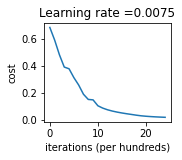

Accuracy for learning_rate: 0.0075 
Accuracy: 0.7
Cost after iteration 0: 0.682692
Cost after iteration 100: 0.566989
Cost after iteration 200: 0.529605
Cost after iteration 300: 0.422613
Cost after iteration 400: 0.816052
Cost after iteration 500: 0.600775
Cost after iteration 600: 0.394587
Cost after iteration 700: 0.459069
Cost after iteration 800: 0.383164
Cost after iteration 900: 0.162637
Cost after iteration 1000: 0.453354
Cost after iteration 1100: 0.187122
Cost after iteration 1200: 0.266210
Cost after iteration 1300: 0.481949
Cost after iteration 1400: 0.512977
Cost after iteration 1500: 0.376402
Cost after iteration 1600: 0.284605
Cost after iteration 1700: 0.479385
Cost after iteration 1800: 0.586926
Cost after iteration 1900: 0.459735
Cost after iteration 2000: 0.585744
Cost after iteration 2100: 0.615592
Cost after iteration 2200: 0.611388
Cost after iteration 2300: 0.317753
Cost after iteration 2400: 0.533017


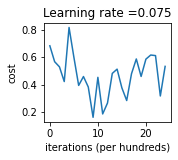

Accuracy for learning_rate: 0.075 
Accuracy: 0.3400000000000001
Cost after iteration 0: 0.682692
Cost after iteration 100: 0.567459
Cost after iteration 200: 0.503009
Cost after iteration 300: 0.445548
Cost after iteration 400: 0.323906
Cost after iteration 500: 0.498324
Cost after iteration 600: 0.394941
Cost after iteration 700: 0.403617
Cost after iteration 800: 0.233374
Cost after iteration 900: 0.477844
Cost after iteration 1000: 0.423022
Cost after iteration 1100: 0.551445
Cost after iteration 1200: 0.273429
Cost after iteration 1300: 0.208513
Cost after iteration 1400: 0.441610
Cost after iteration 1500: 0.515901
Cost after iteration 1600: 0.527274
Cost after iteration 1700: 0.365661
Cost after iteration 1800: 0.434875
Cost after iteration 1900: 0.429571
Cost after iteration 2000: 0.214692
Cost after iteration 2100: 0.528027
Cost after iteration 2200: 0.619557
Cost after iteration 2300: 0.648005
Cost after iteration 2400: 0.391120


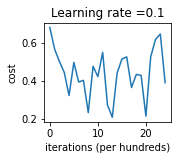

Accuracy for learning_rate: 0.1 
Accuracy: 0.46


In [108]:
# This may take a while to run

plt.figure(figsize=(12, 12))
learning_rates = [0.00075, 0.0075, 0.075, 0.1]
for i, learning_rate in enumerate(learning_rates):
    plt.subplot(2, 2, i+1)
    plt.title('Learning rate is %d' % learning_rate)
    parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate, num_iterations = 2500, print_cost = True, activation = 'tanh')    
    print ("Accuracy for learning_rate: {} ".format(learning_rate))
    predictions_test = predict(test_x, test_y, parameters, activation='tanh')